In [68]:
file='C:\\Data Science\\my-ds-projects\\DSPipeline-master\\Data\\titanic.csv'
file_test='C:\\Data Science\\my-ds-projects\\DSPipeline-master\\Data\\test.csv'

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRFClassifier, XGBClassifier
import catboost as cb
from sklearn import svm
from sklearn.metrics import jaccard_score, accuracy_score, log_loss, f1_score, confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [45]:
df=pd.read_csv(file)
df_test=pd.read_csv(file_test)
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


In [76]:
df.Ticket.value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
W./C. 6608            4
17421                 4
349909                4
113760                4
2666                  4
LINE                  4
113781                4
4133                  4
347077                4
19950                 4
PC 17757              4
110152                3
PC 17755              3
363291                3
248727                3
C.A. 31921            3
110413                3
PC 17582              3
C.A. 34651            3
239853                3
24160                 3
230080                3
F.C.C. 13529          3
345773                3
347742                3
371110                3
PC 17760              3
13502                 3
35273                 3
29106                 3
PC 17572              3
SC/Paris 2123         3
A/5. 3336             2
WE/P 5735       

In [47]:
df[df.Ticket == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [48]:
df[df.Ticket == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [49]:
df[df.Ticket == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [59]:
df[df.Ticket == '3101295']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


In [60]:
df[df.Ticket == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [77]:
df[df.Ticket == 'PC 17760']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C


In [81]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [78]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [4]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df_test.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
521,0,3,male,22.0,0,0,7.8958,NaN,S
546,1,2,female,19.0,1,0,26.0000,NaN,S


In [5]:
df.Sex.replace(to_replace=['male', 'female'], value=[1,0], inplace=True)
df.Sex=df.Sex.astype(int)

df_test.Sex.replace(to_replace=['male', 'female'], value=[1,0], inplace=True)
df_test.Sex=df_test.Sex.astype(int)


In [6]:
df.shape

(891, 9)

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

<AxesSubplot:>

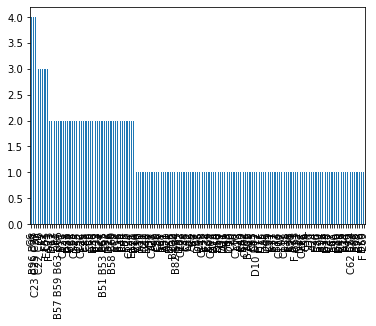

In [10]:
df.Cabin.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

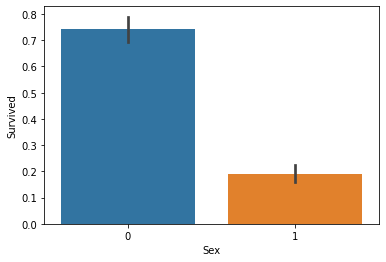

In [11]:
sns.barplot(x="Sex", y="Survived", data=df)

In [12]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(22,4))
#sns.barplot(x="Age", y="Survived", data=df)
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [13]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [14]:
df.Age.replace(np.nan, 29.5, inplace=True)
df_test.Age.replace(np.nan, 29.5, inplace=True)

In [15]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df.Embarked.replace(np.nan, 'S', inplace=True)
df.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[0,1,2], inplace=True)
df_test.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[0,1,2], inplace=True)

In [17]:
df.Fare.mean()
df_test.Fare.mean()
df_test.Fare.replace(np.nan, df.Fare.mean(), inplace=True)

In [18]:
category=pd.cut(df.Age,bins=[0,16,50,81], labels=[1,2,3])
df.insert(1, 'age_grp', category)

In [19]:
df.columns

Index(['Survived', 'age_grp', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [41]:
X_master=df[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y=df.Survived.values
X=preprocessing.StandardScaler().fit_transform(X_master)
X[0:3]

array([[ 0.82737724, -0.58942563,  0.73769513,  0.43279337, -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693,  0.64182097, -1.35557354,  0.43279337, -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724, -0.28161398, -1.35557354, -0.4745452 , -0.47367361,
        -0.48885426, -0.56883712]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

In [43]:
cat_model=cb.CatBoostClassifier(max_depth=8, iterations=500)
cat_model.fit(X_train, y_train, verbose=False)
y_pred=cat_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))
print(confusion_matrix(y_test, y_pred))
#print(cross_val_score(cat_model, X_train, y_train,cv=4))

0.8268156424581006
0.8235251109014169
[[96  9]
 [22 52]]


In [37]:
xg_model=xgb.XGBClassifier(max_depth=11, n_estimators=120, learning_rate=0.3, min_child_weight=2)
#xg_model.fit(X_train, y_train)
xg_model.fit(X_train, y_train, eval_metric=["auc", "error"], eval_set=[(X_test, y_test)])
y_pred = xg_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))
print(confusion_matrix(y_test, y_pred))
#print(cross_val_score(xg_model, X_train, y_train,cv=4))
results = xg_model.evals_result()
#results

[0]	validation_0-auc:0.87548	validation_0-error:0.17318
[1]	validation_0-auc:0.87651	validation_0-error:0.16201
[2]	validation_0-auc:0.87600	validation_0-error:0.16760
[3]	validation_0-auc:0.87915	validation_0-error:0.16760
[4]	validation_0-auc:0.87342	validation_0-error:0.15643
[5]	validation_0-auc:0.88514	validation_0-error:0.16201
[6]	validation_0-auc:0.88629	validation_0-error:0.15643
[7]	validation_0-auc:0.89067	validation_0-error:0.17318
[8]	validation_0-auc:0.88977	validation_0-error:0.16760
[9]	validation_0-auc:0.89131	validation_0-error:0.16201
[10]	validation_0-auc:0.89170	validation_0-error:0.16201
[11]	validation_0-auc:0.89292	validation_0-error:0.16201
[12]	validation_0-auc:0.89627	validation_0-error:0.16201
[13]	validation_0-auc:0.89440	validation_0-error:0.16201
[14]	validation_0-auc:0.90097	validation_0-error:0.16201
[15]	validation_0-auc:0.89981	validation_0-error:0.16201
[16]	validation_0-auc:0.89865	validation_0-error:0.16201
[17]	validation_0-auc:0.89685	validation_

In [32]:
rt=RandomForestClassifier(max_depth=10, class_weight="balanced")
rt.fit(X_train, y_train)
yhat_r=rt.predict(X_test)
print(accuracy_score(y_test, yhat_r))
print(f1_score(y_test, yhat_r, average="weighted"))
#print(confusion_matrix(y_test, yhat_r))
print(cross_val_score(rt, X_train, y_train, cv=4))

0.8324022346368715
0.830138891955749
[0.83707865 0.84831461 0.83707865 0.7752809 ]


In [125]:
lr=LogisticRegression(solver='saga', C=0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(jaccard_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#print(logloss(y_test, lr.predict))
print(f1_score(y_test, y_pred, average="weighted"))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(lr, X_train, y_train,cv=5))


0.5853658536585366
0.8100558659217877
0.804403682174926
[[97  8]
 [26 48]]
[0.81818182 0.81118881 0.81690141 0.78169014 0.83802817]


In [310]:
from sklearn import svm
svm_model=svm.SVC(kernel="linear", C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(jaccard_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#print(logloss(y_test, lr.predict))
print(f1_score(y_test, y_pred, average="weighted"))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(svm_model, X_train, y_train,cv=5))


0.5666666666666667
0.7821229050279329
0.7802287550373269
[[89 16]
 [23 51]]
[0.78321678 0.77622378 0.80985915 0.78169014 0.78873239]


#### Test Data Set

In [298]:
X_TestMaster=df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
X_Test=preprocessing.StandardScaler().fit_transform(X_TestMaster)
X_Test[0:3]

array([[ 0.87348191,  0.75592895,  0.34748219, -0.49947002, -0.4002477 ,
        -0.49825799,  2.24316522],
       [ 0.87348191, -1.32287566,  1.33771641,  0.61699237, -0.4002477 ,
        -0.51312516, -0.6778412 ],
       [-0.31581919,  0.75592895,  2.52599748, -0.49947002, -0.4002477 ,
        -0.46493955,  2.24316522]])

In [329]:
y_pred = xg_model.predict(X_Test)
predictions=pd.DataFrame(y_pred)
predictions
predictions.to_csv("C:\Data Science\my-ds-projects\DSPipeline-master\Data\\answers_1.csv")